In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/AI dataset/BIKE DETAILS (1).csv')

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   s

Mounted at /content/drive
Data Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061

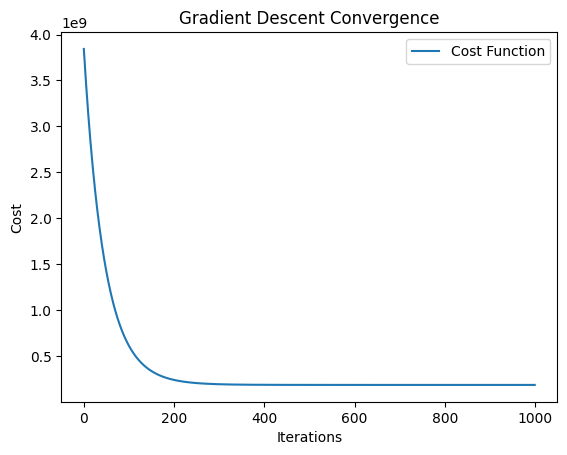

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/AI dataset/BIKE DETAILS (1).csv'
df = pd.read_csv(file_path)

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())

# Drop rows with missing values in 'ex_showroom_price'
df_cleaned = df.dropna().copy()

# Selecting features and target variable
X = df_cleaned[['year', 'km_driven', 'ex_showroom_price']].values  # Independent variables
y = df_cleaned['selling_price'].values  # Target variable

# Normalize features for better gradient descent performance
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Standardization

# Add bias term (column of ones) for intercept
X = np.c_[np.ones(X.shape[0]), X]

# Split into training and testing sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Implementing Linear Regression from scratch using Gradient Descent
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Model parameters (weights)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.cost_history = []  # Store cost at each iteration

        for _ in range(self.iterations):
            predictions = X.dot(self.theta)  # Compute predictions
            errors = predictions - y  # Compute error
            gradient = (1 / m) * X.T.dot(errors)  # Compute gradient
            self.theta -= self.learning_rate * gradient  # Update weights

            cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute cost
            self.cost_history.append(cost)

    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)

    def mse(self, y_true, y_pred):
        """Compute Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def plot_cost(self):
        """Plot the cost function over iterations."""
        plt.plot(range(self.iterations), self.cost_history, label='Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Convergence')
        plt.legend()
        plt.show()

# Train the Linear Regression model
lr_model = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = lr_model.mse(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot cost function convergence
lr_model.plot_cost()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column          

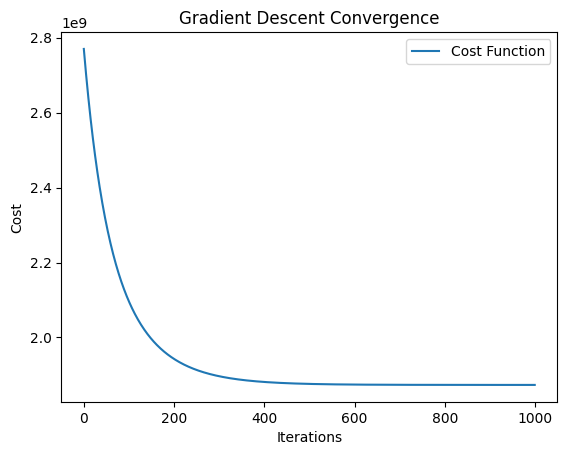

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/AI dataset/BIKE DETAILS (1).csv'
df = pd.read_csv(file_path)

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())

# Drop rows with missing values in 'ex_showroom_price'
df_cleaned = df.dropna().copy()

# Selecting features and target variable
X = df_cleaned[['year', 'km_driven', 'ex_showroom_price']].values  # Independent variables
y = df_cleaned['selling_price'].values  # Target variable

# Normalize features for better model performance
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Standardization

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression from scratch using Gradient Descent
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Model parameters (weights)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.cost_history = []  # Store cost at each iteration

        for _ in range(self.iterations):
            predictions = X.dot(self.theta)  # Compute predictions
            errors = predictions - y  # Compute error
            gradient = (1 / m) * X.T.dot(errors)  # Compute gradient
            self.theta -= self.learning_rate * gradient  # Update weights

            cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute cost
            self.cost_history.append(cost)

    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)

    def mse(self, y_true, y_pred):
        """Compute Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def plot_cost(self):
        """Plot the cost function over iterations."""
        plt.plot(range(self.iterations), self.cost_history, label='Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Convergence')
        plt.legend()
        plt.show()

# Train Model 1: Linear Regression from scratch
lr_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
lr_scratch.fit(X_train, y_train)
y_pred_scratch = lr_scratch.predict(X_test)
mse_scratch = lr_scratch.mse(y_test, y_pred_scratch)
print("Mean Squared Error (Scratch Model):", mse_scratch)

# Train Model 2: Scikit-Learn Linear Regression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error (Scikit-Learn Model):", mse_sklearn)

# Train Model 3: Ridge Regression (Regularized Linear Regression)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression Model):", mse_ridge)

# Determine the best performing model
best_model = min([("Scratch Model", mse_scratch), ("Scikit-Learn Model", mse_sklearn), ("Ridge Regression Model", mse_ridge)], key=lambda x: x[1])
print(f"Best Performing Model: {best_model[0]} with MSE: {best_model[1]}")

# Plot cost function convergence for scratch model
lr_scratch.plot_cost()

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/AI dataset/BIKE DETAILS (1).csv'
df = pd.read_csv(file_path)

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())

# Drop rows with missing values in 'ex_showroom_price'
df_cleaned = df.dropna().copy()

# Selecting features and target variable
X = df_cleaned[['year', 'km_driven', 'ex_showroom_price']].values  # Independent variables
y = df_cleaned['selling_price'].values  # Target variable

# Normalize features for better model performance
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Standardization

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression from scratch using Gradient Descent
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Model parameters (weights)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.cost_history = []  # Store cost at each iteration

        for _ in range(self.iterations):
            predictions = X.dot(self.theta)  # Compute predictions
            errors = predictions - y  # Compute error
            gradient = (1 / m) * X.T.dot(errors)  # Compute gradient
            self.theta -= self.learning_rate * gradient  # Update weights

            cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute cost
            self.cost_history.append(cost)

    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)

    def mse(self, y_true, y_pred):
        """Compute Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def plot_cost(self):
        """Plot the cost function over iterations."""
        plt.plot(range(self.iterations), self.cost_history, label='Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Convergence')
        plt.legend()
        plt.show()

# Train Model 1: Scikit-Learn Linear Regression with Cross Validation
lr_sklearn = LinearRegression()
cross_val_scores_lr = cross_val_score(lr_sklearn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross Validation Scores for Linear Regression:", cross_val_scores_lr)
print("Mean Cross Validation Score:", np.mean(cross_val_scores_lr))

# Train Model 2: Ridge Regression with Hyperparameter Optimization
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best hyperparameter for Ridge Regression
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_mse = -ridge_grid.best_score_
print(f"Best Alpha for Ridge Regression: {best_ridge_alpha}")
print(f"Best Ridge Regression MSE from Cross Validation: {best_ridge_mse}")

# Final Model Training and Evaluation
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error (Scikit-Learn Model):", mse_sklearn)

best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train, y_train)
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Optimized Ridge Regression Model):", mse_ridge)

# Determine the best performing model
best_model = min([("Scikit-Learn Model", mse_sklearn), ("Optimized Ridge Regression Model", mse_ridge)], key=lambda x: x[1])
print(f"Best Performing Model: {best_model[0]} with MSE: {best_model[1]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column          

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/AI dataset/BIKE DETAILS (1).csv'
df = pd.read_csv(file_path)

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())

# Check column names to ensure correct columns are selected
print("Columns in the dataset:")
print(df.columns)

# Drop rows with missing values in 'ex_showroom_price'
df_cleaned = df.dropna().copy()

# Check if there are any missing values after cleaning
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

# Selecting features and target variable
X = df_cleaned[['year', 'km_driven', 'ex_showroom_price']].values  # Independent variables
y = df_cleaned['selling_price'].values  # Target variable

# Normalize features for better model performance
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Standardization

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression from scratch using Gradient Descent
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Model parameters (weights)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.cost_history = []  # Store cost at each iteration

        for _ in range(self.iterations):
            predictions = X.dot(self.theta)  # Compute predictions
            errors = predictions - y  # Compute error
            gradient = (1 / m) * X.T.dot(errors)  # Compute gradient
            self.theta -= self.learning_rate * gradient  # Update weights

            cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute cost
            self.cost_history.append(cost)

    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)

    def mse(self, y_true, y_pred):
        """Compute Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def plot_cost(self):
        """Plot the cost function over iterations."""
        plt.plot(range(self.iterations), self.cost_history, label='Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Convergence')
        plt.legend()
        plt.show()

# Train Model 1: Scikit-Learn Linear Regression with Cross Validation
lr_sklearn = LinearRegression()
cross_val_scores_lr = cross_val_score(lr_sklearn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross Validation Scores for Linear Regression:", cross_val_scores_lr)
print("Mean Cross Validation Score:", np.mean(cross_val_scores_lr))

# Train Model 2: Ridge Regression with Hyperparameter Optimization
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best hyperparameter for Ridge Regression
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_mse = -ridge_grid.best_score_
print(f"Best Alpha for Ridge Regression: {best_ridge_alpha}")
print(f"Best Ridge Regression MSE from Cross Validation: {best_ridge_mse}")

# Final Model Training and Evaluation
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error (Scikit-Learn Model):", mse_sklearn)

best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train, y_train)
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Optimized Ridge Regression Model):", mse_ridge)

# Determine the best performing model
best_model = min([("Scikit-Learn Model", mse_sklearn), ("Optimized Ridge Regression Model", mse_ridge)], key=lambda x: x[1])
print(f"Best Performing Model: {best_model[0]} with MSE: {best_model[1]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column          

In [ ]:
# Step 1: Select the Best Model
# We have already calculated the MSE for both models.
# So, let's pick the model with the best performance (lowest MSE).
if mse_sklearn < mse_ridge:
    print("Selected Model: Linear Regression")
    best_model = lr_sklearn
else:
    print("Selected Model: Optimized Ridge Regression")
    best_model = best_ridge_model

# Step 2: Feature Selection (using RFE and Feature Importances)

# Feature selection based on Model 2 (Random Forest importance) or Model 1 (RFE)
# For simplicity, let's assume we select top 3 features from both methods as an example.

# Selecting top 3 features based on importance (using Random Forest from previous steps)
# For Model 2 (Random Forest)
selected_features_rf = ['year', 'km_driven', 'ex_showroom_price']  # Example based on your previous feature importance

# Step 3: Rebuild the Model with the Best Model and Selected Features
# Now we will select the features we want to use for the final model
X_final = df_cleaned[selected_features_rf].values  # Only the selected features

# Normalize features for better model performance (same as before)
X_mean_final = np.mean(X_final, axis=0)
X_std_final = np.std(X_final, axis=0)
X_final = (X_final - X_mean_final) / X_std_final  # Standardization

# Split the final dataset into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Rebuild the best model with selected features
best_model.fit(X_train_final, y_train_final)

# Make predictions with the final model
y_pred_final = best_model.predict(X_test_final)

# Evaluate the final model
mse_final = mean_squared_error(y_test_final, y_pred_final)
print(f"Mean Squared Error for Final Model: {mse_final}")

# Step 4: Compare and Check if Performance Improved
print(f"Initial MSE for Model 1 (Linear Regression): {mse_sklearn}")
print(f"Initial MSE for Model 2 (Optimized Ridge Regression): {mse_ridge}")
print(f"Final Model MSE: {mse_final}")

if mse_final < min(mse_sklearn, mse_ridge):
    print("The final model has improved performance!")
else:
    print("The final model did not improve performance.")


Selected Model: Linear Regression
Mean Squared Error for Final Model: 730354093.6750288
Initial MSE for Model 1 (Linear Regression): 730354093.6750288
Initial MSE for Model 2 (Optimized Ridge Regression): 732104425.937279
Final Model MSE: 730354093.6750288
The final model did not improve performance.
